# Importing neccessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.callbacks import Callback
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.


# Creating ETL: Extract, Transform, Load

In [3]:
# The code was removed by Watson Studio for sharing.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking the shape of the Dataframe
df.shape

(284807, 31)

In [5]:
# we get that there are 284807 rows and 31 columns
# now Checking for any missing values
df.isnull().sum().sum()

0

# Exploratory Data Analysis and Statistical measures, data visualization

In [6]:
#checking number genuine and fraud transactions
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Checking some statistical calculations on every column and row
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


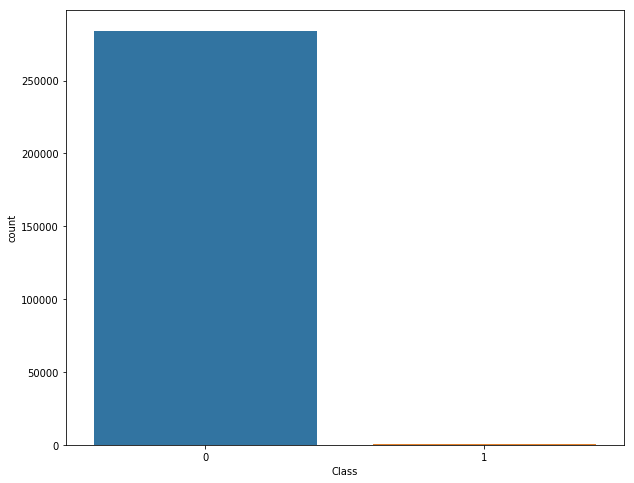

In [8]:
# making plot to see the data for fraudulent and genuine transactions
plt.figure(figsize=(10,8))
sns.countplot(x=df['Class'])
plt.show()

In [9]:
# calculating percentage of data that is fraud against genuine data
print(f"percent of fraud transactions against genuine transactions is: {(len(df[df.Class == 1])/ len(df[df.Class == 0]))*100}")

percent of fraud transactions against genuine transactions is: 0.17304750013189596


Highest Fruad amount was : 2125
Least   Fruad amount was : 0


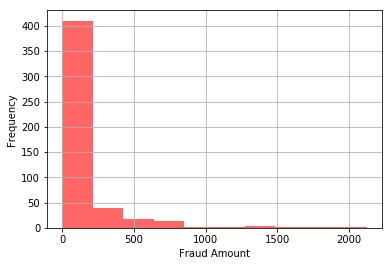

In [10]:
# checking the different amounts for fraud transactions
fraud_amount = df[df.Class == 1]["Amount"]
fraud_amount = fraud_amount.astype(int)
fraud_amount.hist(color = "r",alpha = 0.6)
plt.xlabel("Fraud Amount")
plt.ylabel("Frequency")
print("Highest Fruad amount was :",max(fraud_amount))
print("Least   Fruad amount was :",min(fraud_amount))

I have no idea how they are considering 0 as fraud transaction amount

### from above histogram we can see that the majority of frauds are under 1000.

# Linear Regression

In [11]:
x=df.drop("Class", axis=1)
y=df["Class"]

In [13]:
lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
lr.fit(x_train,y_train)
#train_set
train_pred = lr.predict(x_train)
train_pred
# This will tell us how our values like "V1", "V2","V3", etc. are related to "Class" that is genuine or fraud transaction.

array([-0.00125459,  0.00482217,  0.00357518, ...,  0.0068096 ,
       -0.00113905,  0.00244891])

In [15]:
# lets check the all these values for the test value
test_pred=lr.predict(x_test)

In [16]:
test_pred

array([ 5.88328236e-04, -1.66942233e-03,  2.48503891e-03, ...,
        2.88128389e-03, -5.69311669e-04, -2.49715804e-05])

## feature creation and feature engineering

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
Lr = LogisticRegression()
#Predict the value by Logistic Regression
Lr.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Predict on test dataset
Lr_pred = Lr.predict(x_test)
#check the accuracy
accuracy_score(Lr_pred,y_test)

0.9990051847430451

In [19]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report,recall_score
f1_score(y_test,Lr_pred)

0.6530612244897959

In [20]:
recall_score(y_test,Lr_pred)

0.5925925925925926

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
random_forest = RandomForestClassifier()
svc = SVC()
random_forest.fit(x_train,y_train)

random_forest_pred = random_forest.predict(x_test)
accuracy_score(random_forest_pred,y_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9994382219725431

In [23]:
f1_score(random_forest_pred,y_test)

0.8032786885245902

In [24]:
recall_score(random_forest_pred,y_test)

0.8990825688073395

In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [26]:
model = Sequential([
    Dense(units=16,input_dim = 30,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs=3)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
199364/199364 [==============================] - 434s 2ms/sample - loss: 0.4326 - acc: 0.9728
Epoch 2/3
199364/199364 [==============================] - 405s 2ms/sample - loss: 0.0288 - acc: 0.9982
Epoch 3/3
199364/199364 [==============================] - 455s 2ms/sample - loss: 0.0288 - acc: 0.9982


In [29]:
score = model.evaluate(x_test,y_test)

85443/85443 [==============================] - 30s 352us/sample - loss: 0.0255 - acc: 0.9984


In [31]:
y_pred = model.predict(x_test)
y_test_copy = pd.DataFrame(y_test)

In [32]:
y_pred = y_pred.astype(int)

In [33]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,85308,0
1,135,0


In [34]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

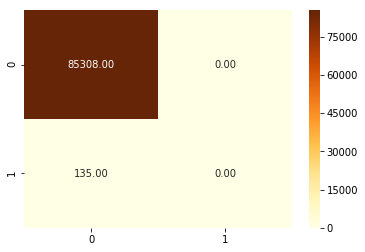

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='YlOrBr',fmt='.2f')
plt.savefig('deep.png')
plt.show()